In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv3D, MaxPooling3D

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
PATH = 'data'
fileList_ori = os.listdir(PATH)
labels = {'Alanine':0, 'glycine':1, 'Aspartic_acid':2, 'Cysteine':3,
         'Glutamic_acid':4, 'Homocysteine':5, 'Isoleucine':6, 'Leucine':7,
         'Lysine':8, 'Methionine':9, 'Norvaline':10, 'Phenylalanine':11,
         'Pipecolic_acid':12, 'Proline':13, 'Valine':14, 'alpha_Aminobutyric_acid':15,
         'beta_Aminoisobutyric_acid':16}


fileList = []
for i in range(len(fileList_ori)):
    for j in range(10):
        fileList.append(fileList_ori[i])

In [3]:
train_num = len(fileList)

input_x = 32
input_y = 32 
input_z = 32

x_train = np.zeros((train_num, input_x, input_y, input_z, 1))
y_train = np.zeros((train_num, 17))

for j in range(len(fileList)):
    
    print ("{}/{} - {} loaded".format(j, len(fileList), PATH+'/'+fileList[j]))
    
    dfs = pd.read_excel(PATH+'/'+fileList[j], sheet_name='Sheet1')
    index = dfs.columns
    label = fileList[j].split('-')
    #print label

    tmp = []
    for i in range(len(dfs)):
        tmp.append([dfs[index[0]][i], dfs[index[1]][i], dfs[index[2]][i]])
    tmp = np.asarray(tmp)

    xData = tmp[:,0]/max(tmp[:,0]) * (input_x-1)
    yData = tmp[:,1]/max(tmp[:,1]) * (input_y-1)
    zData = tmp[:,2]/max(tmp[:,2]) * (input_z-1)

    for i in range(len(xData)):
        #print ('x:{}, y:{}, z:{}'.format(int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i]))))
        x_train[j, int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i])), 0] = 1
        y_train[j, labels[label[0]]] = 1

0/190 - data/Norvaline-standard.xlsx loaded
1/190 - data/Norvaline-standard.xlsx loaded
2/190 - data/Norvaline-standard.xlsx loaded
3/190 - data/Norvaline-standard.xlsx loaded
4/190 - data/Norvaline-standard.xlsx loaded
5/190 - data/Norvaline-standard.xlsx loaded
6/190 - data/Norvaline-standard.xlsx loaded
7/190 - data/Norvaline-standard.xlsx loaded
8/190 - data/Norvaline-standard.xlsx loaded
9/190 - data/Norvaline-standard.xlsx loaded
10/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
11/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
12/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
13/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
14/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
15/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
16/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
17/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
18/190 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
19/190 - data/alpha_Aminobuty

177/190 - data/beta_Aminoisobutyric_acid-standard.xlsx loaded
178/190 - data/beta_Aminoisobutyric_acid-standard.xlsx loaded
179/190 - data/beta_Aminoisobutyric_acid-standard.xlsx loaded
180/190 - data/Alanine-standard.xlsx loaded
181/190 - data/Alanine-standard.xlsx loaded
182/190 - data/Alanine-standard.xlsx loaded
183/190 - data/Alanine-standard.xlsx loaded
184/190 - data/Alanine-standard.xlsx loaded
185/190 - data/Alanine-standard.xlsx loaded
186/190 - data/Alanine-standard.xlsx loaded
187/190 - data/Alanine-standard.xlsx loaded
188/190 - data/Alanine-standard.xlsx loaded
189/190 - data/Alanine-standard.xlsx loaded


In [4]:
index = np.arange(len(fileList))
np.random.shuffle(index)

x_train_shuffle = np.zeros((train_num, input_x, input_y, input_z, 1))
y_train_shuffle = np.zeros((train_num, 17))
for i in range(len(index)):
    x_train_shuffle[i] = x_train[index[i]]
    y_train_shuffle[i] = y_train[index[i]]

In [5]:
test_num = len(fileList_ori)

x_test = np.zeros((test_num, input_x, input_y, input_z, 1))
y_test = np.zeros((test_num, 17))

for j in range(len(fileList_ori)):
    
    print "{}/{} - {} loaded".format(j, len(fileList_ori), PATH+'/'+fileList_ori[j])
        
    dfs = pd.read_excel(PATH+'/'+fileList_ori[j], sheet_name='Sheet1')
    index = dfs.columns
    label = fileList_ori[j].split('-')
    #print label

    tmp = []
    for i in range(len(dfs)):
        tmp.append([dfs[index[0]][i], dfs[index[1]][i], dfs[index[2]][i]])
    tmp = np.asarray(tmp)

    xData = tmp[:,0]/max(tmp[:,0]) * (input_x-1)
    yData = tmp[:,1]/max(tmp[:,1]) * (input_y-1)
    zData = tmp[:,2]/max(tmp[:,2]) * (input_z-1)

    for i in range(len(xData)):
        #print ('x:{}, y:{}, z:{}'.format(int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i]))))
        x_test[j, int(np.trunc(xData[i])), int(np.trunc(yData[i])), int(np.trunc(zData[i])), 0] = 1
        y_test[j, labels[label[0]]] = 1

0/19 - data/Norvaline-standard.xlsx loaded
1/19 - data/alpha_Aminobutyric_acid-standard.xlsx loaded
2/19 - data/Pipecolic_acid-standard.xlsx loaded
3/19 - data/Homocysteine-standard.xlsx loaded
4/19 - data/Glutamic_acid-standard.xlsx loaded
5/19 - data/Leucine-standard.xlsx loaded
6/19 - data/Isoleucine-standard.xlsx loaded
7/19 - data/glycine-standard.xlsx loaded
8/19 - data/Proline-standard.xlsx loaded
9/19 - data/Valine-standard.xlsx loaded
10/19 - data/Aspartic_acid-standard.xlsx loaded
11/19 - data/Methionine-standard.xlsx loaded
12/19 - data/Lysine-standard.xlsx loaded
13/19 - data/glycine-sample.xlsx loaded
14/19 - data/Alanine-sample.xlsx loaded
15/19 - data/Cysteine-standard.xlsx loaded
16/19 - data/Phenylalanine-standard.xlsx loaded
17/19 - data/beta_Aminoisobutyric_acid-standard.xlsx loaded
18/19 - data/Alanine-standard.xlsx loaded


In [6]:
nb_filters = [32, 32]
nb_conv = [3, 3]
nb_pool = [2, 2]
nb_classes = 17

model = Sequential()
model.add(Conv3D(nb_filters[0], (nb_conv[0], nb_conv[0], nb_conv[0]), input_shape=(input_x, input_y, input_z, 1), activation='relu'))
model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Conv3D(nb_filters[0], (nb_conv[0], nb_conv[0], nb_conv[0]), input_shape=(input_x, input_y, input_z, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, kernel_initializer='normal'))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['mse', 'accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 30, 30, 30, 32)    896       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 15, 15, 15, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 13, 13, 13, 32)    27680     
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 13, 32)    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 70304)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8999040   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [7]:
nb_epoch = 10
batch_size = 32

hist = model.fit( x_train_shuffle, y_train_shuffle, batch_size=batch_size, epochs = nb_epoch, shuffle=True)

Epoch 1/10
190/190 [==============================] - 14s 73ms/step - loss: 2.7304 - mse: 0.0544 - accuracy: 0.1526
Epoch 2/10
190/190 [==============================] - 14s 72ms/step - loss: 1.7437 - mse: 0.0408 - accuracy: 0.6158
Epoch 3/10
190/190 [==============================] - 14s 72ms/step - loss: 0.7896 - mse: 0.0201 - accuracy: 0.8474
Epoch 4/10
190/190 [==============================] - 14s 73ms/step - loss: 0.3526 - mse: 0.0084 - accuracy: 0.9368
Epoch 5/10
190/190 [==============================] - 14s 73ms/step - loss: 0.1507 - mse: 0.0031 - accuracy: 0.9842
Epoch 6/10
190/190 [==============================] - 14s 72ms/step - loss: 0.1012 - mse: 0.0020 - accuracy: 0.9947
Epoch 7/10
190/190 [==============================] - 14s 72ms/step - loss: 0.0616 - mse: 0.0011 - accuracy: 0.9947
Epoch 8/10
190/190 [==============================] - 14s 73ms/step - loss: 0.0335 - mse: 6.3909e-04 - accuracy: 0.9947
Epoch 9/10
190/190 [==============================] - 14s 74ms/step 

In [8]:
score = model.evaluate(x_test, y_test, batch_size=batch_size) #show_accuracy=True
classes= model.predict_classes(x_test)
print('**********************************************')
print('Test score:', score)
print('History', hist.history)
print('**********************************************')
for i in range(len(classes)):
    print('Label: {}, Predicted: {}'.format(list(labels.keys())[list(labels.values()).index(np.argmax(y_test[i]))], 
                                            list(labels.keys())[list(labels.values()).index(classes[i])]))

19/19 [==============================] - 0s 5ms/step
**********************************************
('Test score:', [0.0012787780724465847, 9.425692724107648e-07, 1.0])
('History', {'loss': [2.7303886739831222, 1.7436593356885408, 0.7895920922881678, 0.35258556165193256, 0.15072387849029742, 0.10116570325274217, 0.06158289274102763, 0.033518854940408155, 0.017301685304233903, 0.018779895180150084], 'mse': [0.054417882, 0.040807012, 0.020145265, 0.008387373, 0.0031085156, 0.0019694478, 0.0010631167, 0.00063909363, 0.00021203807, 0.00021644321], 'accuracy': [0.15263158, 0.6157895, 0.8473684, 0.9368421, 0.98421055, 0.99473685, 0.99473685, 0.99473685, 1.0, 1.0]})
**********************************************
Label: Norvaline, Predicted: Norvaline
Label: alpha_Aminobutyric_acid, Predicted: alpha_Aminobutyric_acid
Label: Pipecolic_acid, Predicted: Pipecolic_acid
Label: Homocysteine, Predicted: Homocysteine
Label: Glutamic_acid, Predicted: Glutamic_acid
Label: Leucine, Predicted: Leucine
Lab

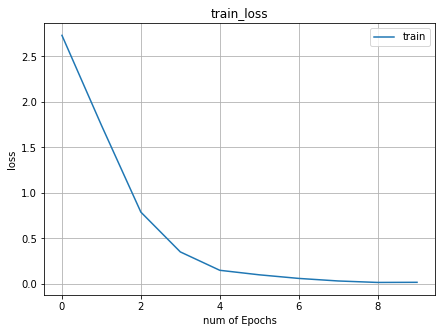

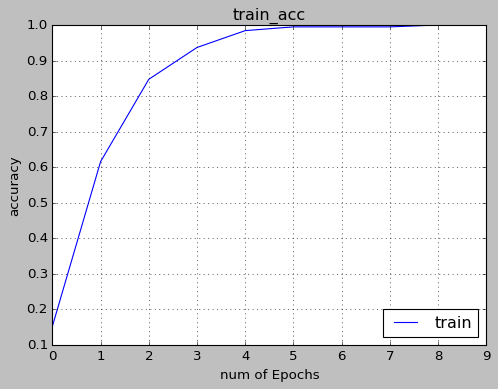

In [9]:
# Plot the results
train_loss=hist.history['loss']
#val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
#val_acc=hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
#plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss') # vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
#plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc') # vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])